# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
import pandas as pd
import numpy as np
import scipy as ss

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# creating dataframe
student_data = pd.DataFrame(
    {'StudentID': [i for i in range(1, 11)],
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
     'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
    }
)

In [4]:
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

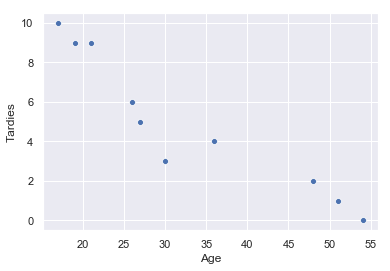

In [5]:
sns.set()
sns.scatterplot(x='Age',
               y='Tardies',
               data=student_data)

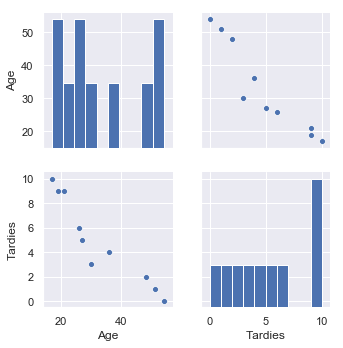

In [6]:
# we can also us a pairplot(), a function that run a scatterplot to all variables agaist each other
sns.pairplot(student_data[['Age', 'Tardies']])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

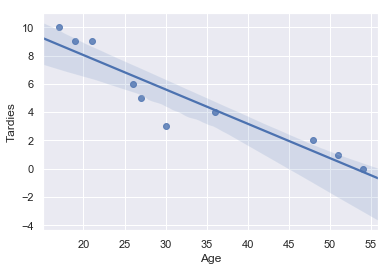

In [7]:
sns.regplot(x='Age',
           y='Tardies',
           data=student_data)

* The chart above presents a trend of a negative relationship between 'Age' and 'Tardies' -- which means that people with higher age are those who tend to be the laters.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

* While variance express the behavior of a single variable, __covariance indicates the level to which two variables vary together__. In order to calculate the covariance we can use:

    > * numpy.cov
    > * scipy.cov
    
* What covariance tells us?
    > * Direction: negative or positive relationship
    > * NOT the streght
    
* The covariance matrix returns a index that vary accordingly with the data, not a normalized one such as the correlate -- that varies from -1 to +1

In [91]:
# calculate the covariance matrix
ss.cov(
    student_data['Age'],
    student_data['Tardies']
)

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

In [92]:
# just to make it pretty
def df_cov(cols):
    df = pd.DataFrame(ss.cov(cols.T))
    df.columns = cols.columns
    return(df)

In [93]:
df_cov(student_data[['Age', 'Tardies']])

,Age,Tardies
0,187.655556,-45.566667
1,-45.566667,12.544444


In [94]:
from scipy.stats import pearsonr

In [95]:
corr, _ = pearsonr(student_data['Age'], 
                   student_data['Tardies'])

In [13]:
# correlation returns the direction and the strengh from each variable
corr

-0.9391626886887122

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

### 0. pre-processing

In [258]:
# method 1: selecting variables
# independent variable
X = pd.DataFrame(data=student_data, 
                 columns=['Age'])

# dependent variable
y = pd.DataFrame(data=student_data, 
                 columns=['Tardies'])

In [259]:
# methodo 2:

# independent variable
# values converts it into a numpy array
X = student_data.iloc[:,1:2].values

# dependent variable
y = student_data.iloc[:, 2:3].values

In [260]:
# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=43)

### 1. modeling

In [338]:
# instantiate the LinearRegression class
linReg = LinearRegression()

In [339]:
# fit the model -- the algorithm will learn about the data pattern
model = linReg.fit(X_train, y_train)

### 2. prediction (test)

In [340]:
# predict the y_test that we splitted
y_pred_test = linReg.predict(X_test)

In [341]:
y_pred_test

array([[7.70032573],
       [5.61889251],
       [8.16286645]])

### 3. evaluate (test)

In [284]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

In [300]:
def lm_test(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rme = np.sqrt(mean_absolute_error(y_test, y_test))
    df_test = pd.DataFrame({'Mean Absolute Error':[mae], 
                           'Mean Squared Error': [mse],
                           'Root Mean Squared Error': [rme]})
    df_test = df_test.T
    df_test.columns = ['lm_test']
    return(df_test)

In [301]:
lm_test(y_test, y_pred_test)

,lm_test
Mean Absolute Error,1.585233
Mean Squared Error,3.082848
Root Mean Squared Error,0.000000


In [355]:
def lm(col_x, col_y):
    # get numpy arrays from series
    X = col_x.values
    y = col_y.values
    
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=43)
    return(y_test)

In [356]:
lm(student_data['Age'], student_data['Tardies'])

array([9, 3, 9])

### 4. predict

In [302]:
# predict the values
y_pred = linReg.predict(X)

# include predictable tardies within the dataframe
student_data['pred_tardies'] = y_pred

In [303]:
student_data.head(1)

,StudentID,Age,Tardies,pred_tardies
0,1,17,10,8.625407


### 5. Interpret the results

* This is the linear regression equation:
__y= mX + b__
> * y: target variable
> * X: feature variables

In [207]:
# coefficient, represented by 'b'
b = linReg.coef_

In [208]:
# intercept, represented by 'm'
m = linReg.intercept_

* coefficient of -0.24: it means that for every unite of change in X (age), the change in y (tardie) is about 24% -- in a negative direction. 
* In other words: for every year of increasing in age, it will represent a decrease of 24% in tardies.

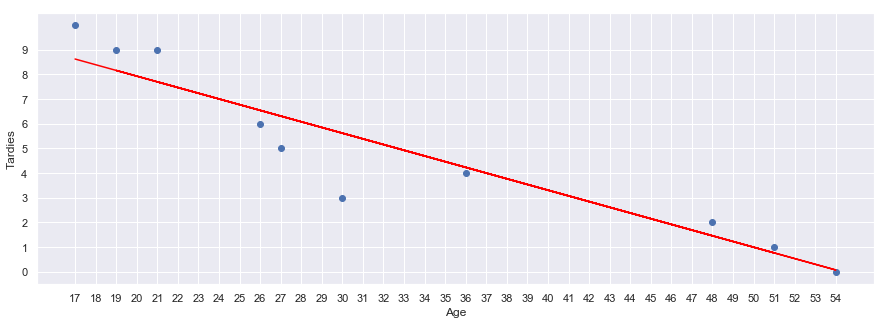

In [225]:
# visualize the results
plt.figure(figsize=(15,5))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Age')
plt.ylabel('Tardies')

# set the ticks
plt.yticks(np.arange(0, 10, step=1))
plt.xticks(np.arange(17, 55, step=1))
plt.show()

### 6. Compare the results

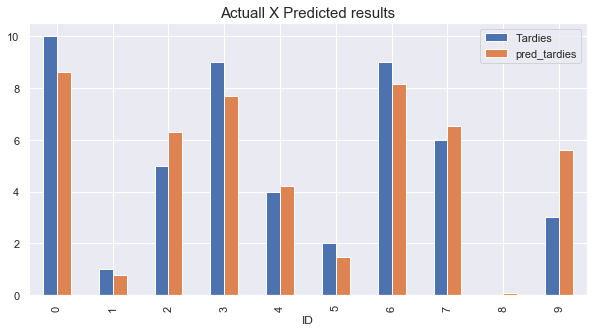

In [307]:
student_data[['Tardies', 'pred_tardies']].plot(kind='bar', figsize=(10,5))
plt.title('Actuall X Predicted results', fontsize=15);
plt.xlabel('ID')
plt.show()

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [363]:
vehicles = pd.read_csv('vehicles.csv')

In [364]:
vehicles.head(1)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [365]:
cols = ['Year', 
        'Cylinders', 
        'Fuel Barrels/Year', 
        'Combined MPG', 
        'Fuel Cost/Year']

In [366]:
# slice the data with 'cols' list
vehicles_n = vehicles[cols]

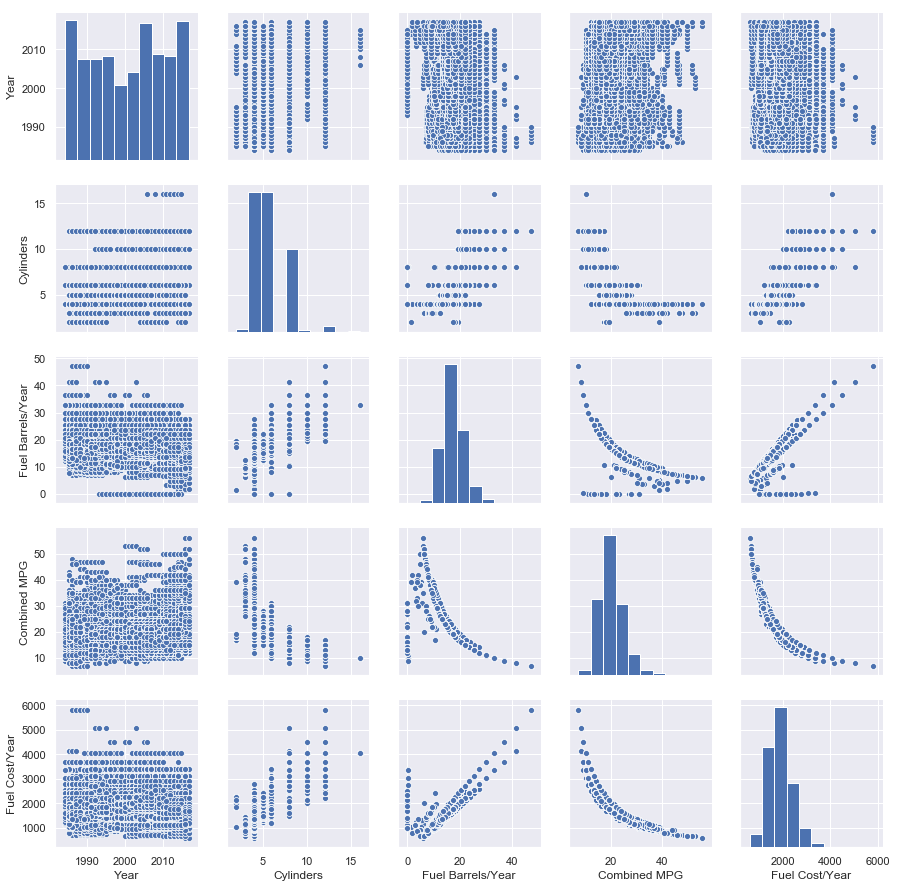

In [367]:
# plot pairplot to get the relationship among variables
sns.pairplot(vehicles_n)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [110]:
logReg2 = LinearRegression()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [127]:
df = pd.DataFrame({'invited': [1,3,4,6,8,9,11,14],
                   'attended':[1,2,4,4,5,7,8,13]})

In [129]:
df.head(1)

,invited,attended
0,1,1


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

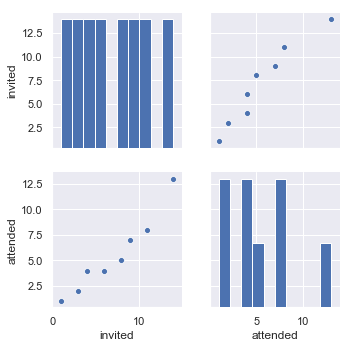

In [130]:
sns.pairplot(df)

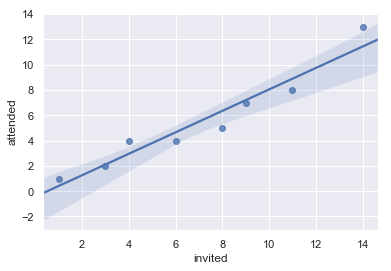

In [131]:
sns.regplot(df['invited'], df['attended'])

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [133]:
X = pd.DataFrame(data=df['invited'])
y = pd.DataFrame(data=df['attended'])

In [134]:
logReg3 = LinearRegression()

In [136]:
lm3 = logReg3.fit(X, y)

In [137]:
lm3.intercept_

array([-0.43939394])

In [138]:
lm3.coef_

array([[0.84848485]])

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 